In [808]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import unit_impulse,fftconvolve
from numpy.lib.scimath import sqrt as csqrt

In [646]:
def x(t):
    x_t = np.cos(2*pi*3200*t) + 0.5*np.cos(2*pi*600*t) + 0.01*np.cos(2*pi*300*t)
    return x_t

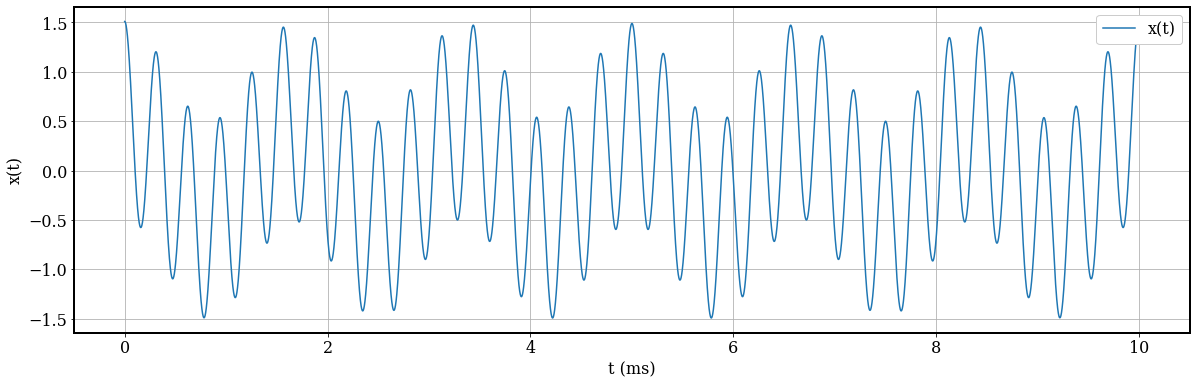

In [451]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
figure = plt.figure(figsize = (20, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
t = np.linspace(0, 0.01, 10000)
pi = np.pi
plt.plot(1000*t, x(t), label = 'x(t)')
plt.grid(True)
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.legend(loc = 'upper right', framealpha = 1)

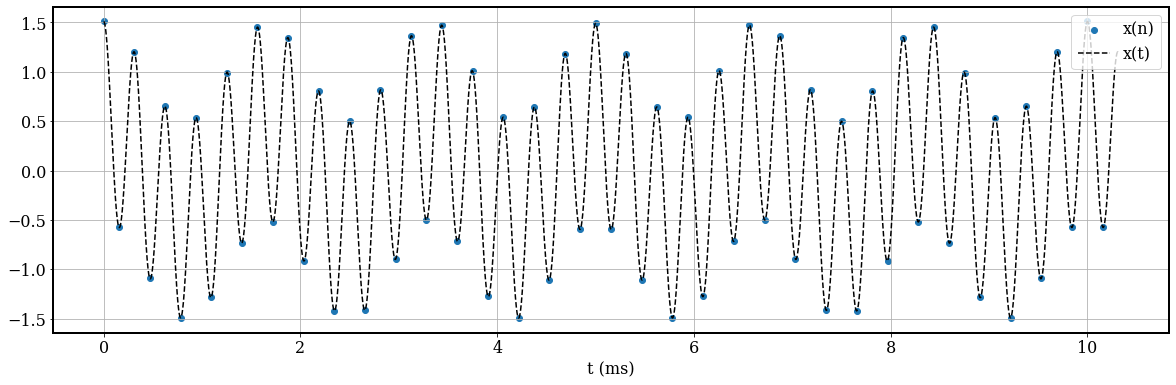

In [748]:
f1 = 3200
f2 = 600
f3 = 300
T = 5e-3 ## period of the signal
fs = 2*np.max([f1, f2, f3]) ## sampling frequency
#fs = 4000
Ts = 1/fs ## Sampling period
N_ = int(np.floor(T/Ts)) + 1  ## number of samples in a period of the analogic signal
N = 2*N_ ## number of samples
t = np.linspace(0, N*Ts, 10000)
n = np.arange(N)*Ts

figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.scatter(1000*n, x(n),label = 'x(n)') ## sinal amostrado
plt.plot(1000*t, x(t),'--',label = 'x(t)', color = 'Black')
plt.grid(True)
plt.xlabel('t (ms)')
plt.legend(loc = 'upper right')

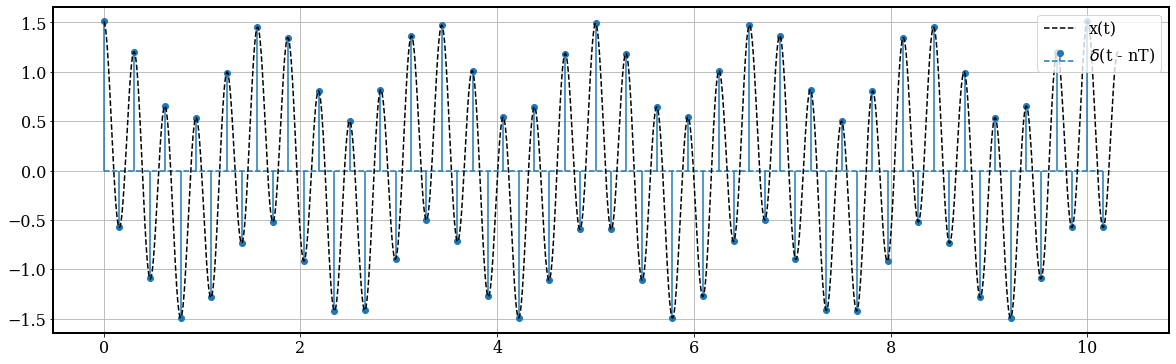

In [749]:
figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.stem(1000*n, x(n), basefmt = '--', label = '$\delta$' + '(t - nT)') ## sinal amostrado
plt.plot(1000*t, x(t),'--',label = 'x(t)', color = 'Black')
plt.grid(True)
plt.legend(loc = 'upper right')


(0.0, 8000.0)

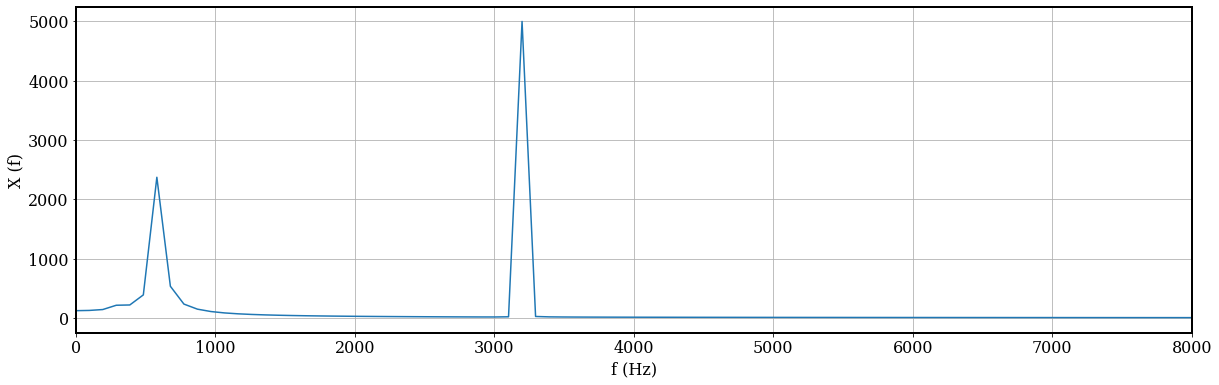

In [761]:
figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
j = csqrt(-1)
T_ = t[1] - t[0]
f = np.fft.fftfreq(len(x(t)), T_)
fft_s = np.fft.fft(x(t))
w_s = f[:x(t).size//2] ## only the positive frequencies
amplitude_fft_signal = fft_s[:x(t).size//2]
#plt.plot(w_s + 3200, abs(amplitude_fft_signal))
plt.plot(w_s, abs(amplitude_fft_signal))
plt.grid(True)
plt.xlabel('f (Hz)')
plt.ylabel('X (f)')
plt.xlim([0, 8000])

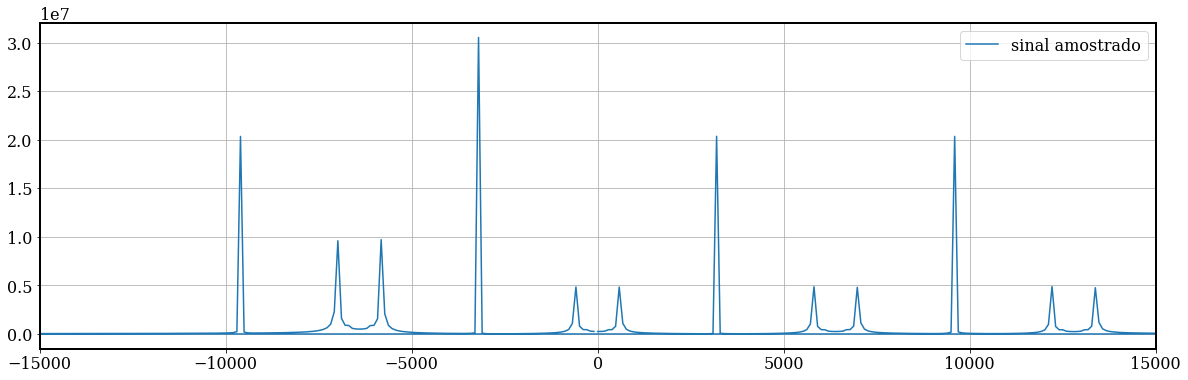

In [759]:
y = x(t)*np.exp(j*2*pi*fs*t*0) + x(t)*np.exp(j*2*pi*fs*t*1) + x(t)*np.exp(j*2*pi*fs*t*2) + x(t)*np.exp(-j*2*pi*fs*t*1) + x(t)*np.exp(-j*2*pi*fs*t*1)
f_ = np.fft.fftfreq(len(y), t[1] - t[0])
X_w = np.fft.fft(y)

figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.plot(f_, abs(X_w)/(Ts*pi),label = 'sinal amostrado')
plt.grid(True)
plt.xlim([-15000, 15000])
plt.legend(loc = 'upper right')

## Reconstruction

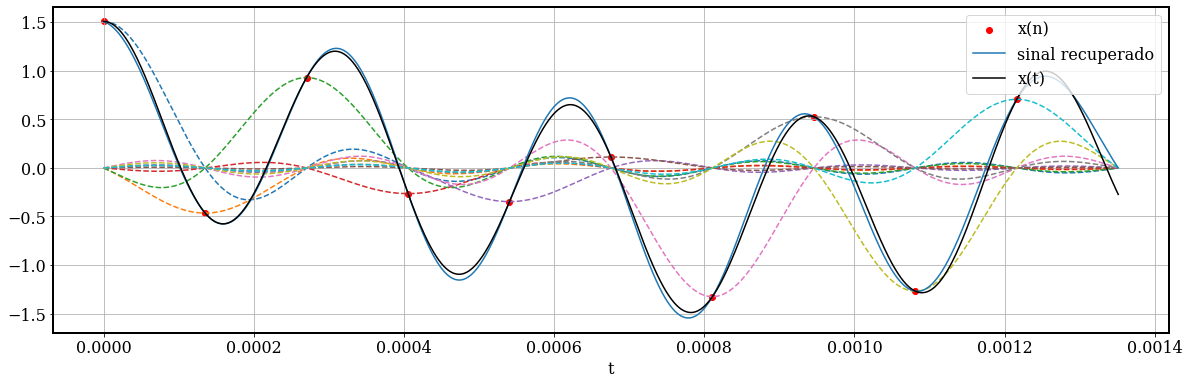

In [536]:
figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)

N = 10
fs = 2*np.max([f1, f2, f3]) + 1000 ## sampling frequency
FS = fs
Ts = 1/FS ## number of samples
t = np.linspace(0, N*Ts, 10000)
n = np.arange(N)*Ts
soma = np.zeros(10000)

plt.scatter(n, x(n),label = 'x(n)', color = 'red') ## sinal amostrado
plt.grid(True)

for i in range(N):
    sample = x(n[i])*np.sinc((t - i*Ts)/Ts)
    soma = soma + sample
    plt.plot(t, sample,'--')

plt.plot(t, soma,label = 'sinal recuperado')
plt.plot(t, x(t),label = 'x(t)', color = 'Black')
plt.xlabel('t')
plt.legend(loc = 'upper right')
    

## DOWNSAMPLING

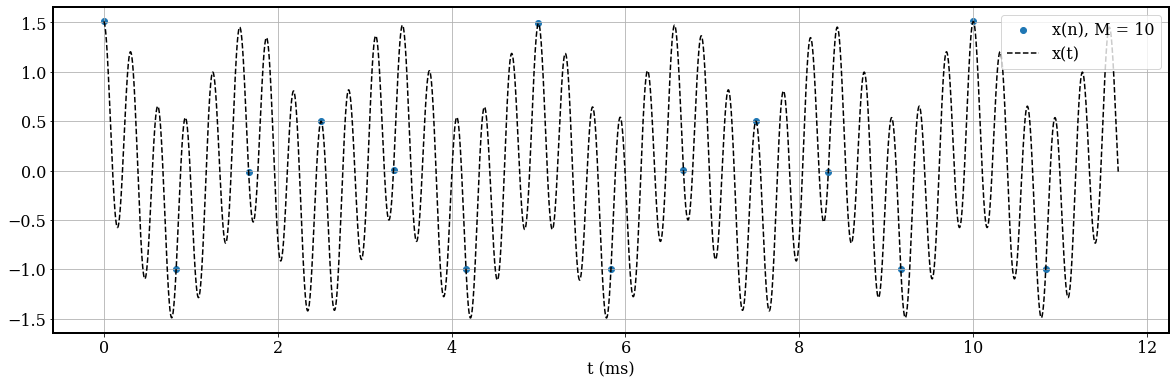

In [791]:
fsd = 6000
M = 5 ## fator
Td = M*1/fsd ## Sampling period with a factor of M
N_ = int(np.floor(T/Td)) + 1  ## number of samples in a period of the analogic signal
N = 2*N_ ## number of samples
t = np.linspace(0, N*Td, 10000)
n = np.arange(N)*Td

figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.scatter(1000*n, x(n),label = 'x(n), M = 10') ## sinal amostrado
plt.plot(1000*t, x(t),'--',label = 'x(t)', color = 'Black')
plt.grid(True)
plt.xlabel('t (ms)')
plt.legend(loc = 'upper right')

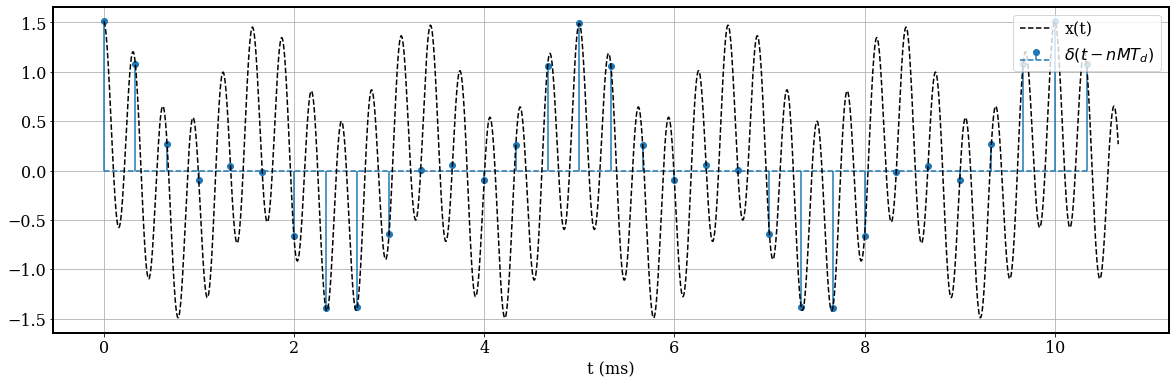

In [763]:
figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.stem(1000*n, x(n), basefmt = '--', label = '$\delta$' + '$(t - nMT_d)$') ## sinal amostrado
plt.plot(1000*t, x(t),'--',label = 'x(t)', color = 'Black')
plt.xlabel('t (ms)')
plt.grid(True)
plt.legend(loc = 'upper right')

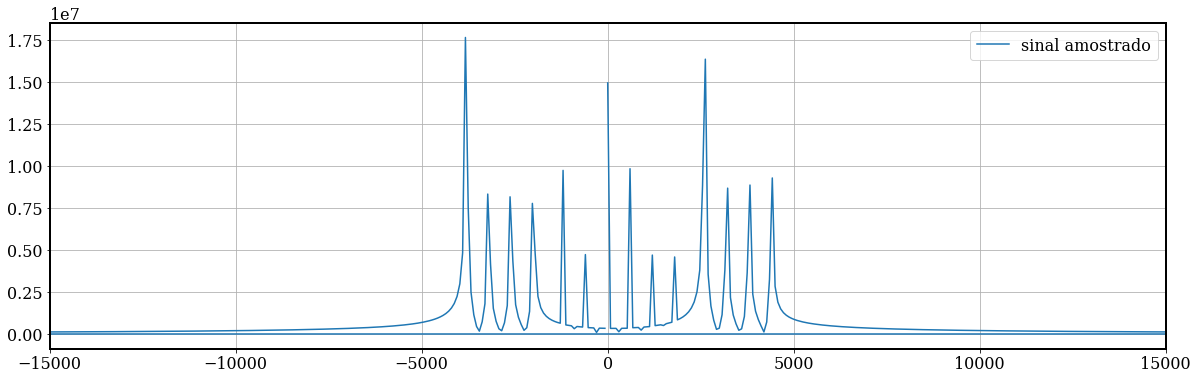

In [779]:
y = x(t)*np.exp(j*2*pi/Td*t*0) + x(t)*np.exp(j*2*pi/Td*t*1) + x(t)*np.exp(j*2*pi/Td*t*2) + x(t)*np.exp(-j*2*pi/Td*t*1) + x(t)*np.exp(-j*2*pi/Td*t*1)
f_ = np.fft.fftfreq(len(y), t[1] - t[0])
X_w = np.fft.fft(y)

figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.plot(f_, abs(X_w)/(Ts*pi),label = 'sinal amostrado')
plt.grid(True)
plt.xlim([-15000, 15000])
plt.legend(loc = 'upper right')

## Upsampling

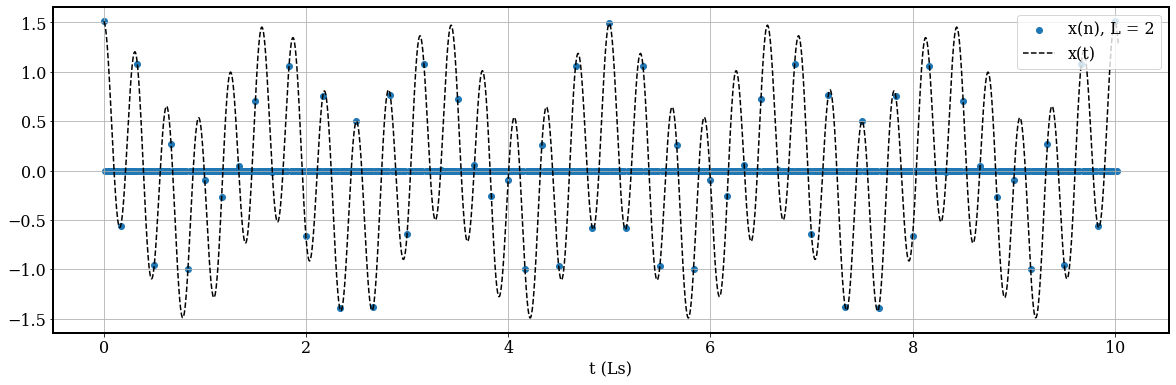

In [802]:
fsd = 6000
L = 10 ## fator
Tl = 1/(fsd*L) ## SaLpling period with a factor of L
N_ = int(np.floor(T/Tl)) + 1  ## nuLber of saLples in a period of the analogic signal
N = 2*N_ ## nuLber of saLples
t = np.linspace(0, N*Tl, 10000)
n = np.arange(N)*Tl
x_n = np.zeros(N)

for i in range(N):
    if (i % L) == 0:
        x_n[i] = x(i*Tl)
    else:
        x_n[i] = 0
        
figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.scatter(1000*n, x_n,label = 'x(n), L = 2') ## sinal aLostrado
plt.plot(1000*t, x(t),'--',label = 'x(t)', color = 'Black')
plt.grid(True)
plt.xlabel('t (Ls)')
plt.legend(loc = 'upper right')

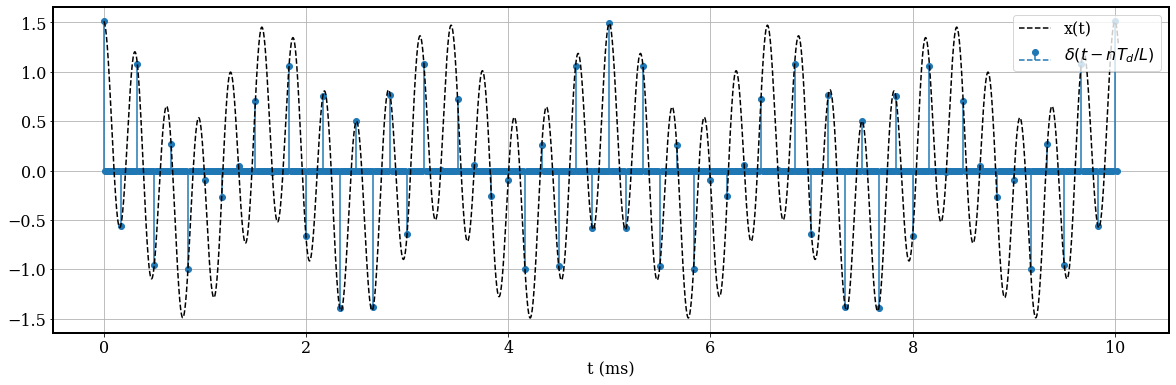

In [803]:
figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.stem(1000*n, x_n, basefmt = '--', label = '$\delta$' + '$(t - nT_d/L)$') ## sinal amostrado
plt.plot(1000*t, x(t),'--',label = 'x(t)', color = 'Black')
plt.xlabel('t (ms)')
plt.grid(True)
plt.legend(loc = 'upper right')

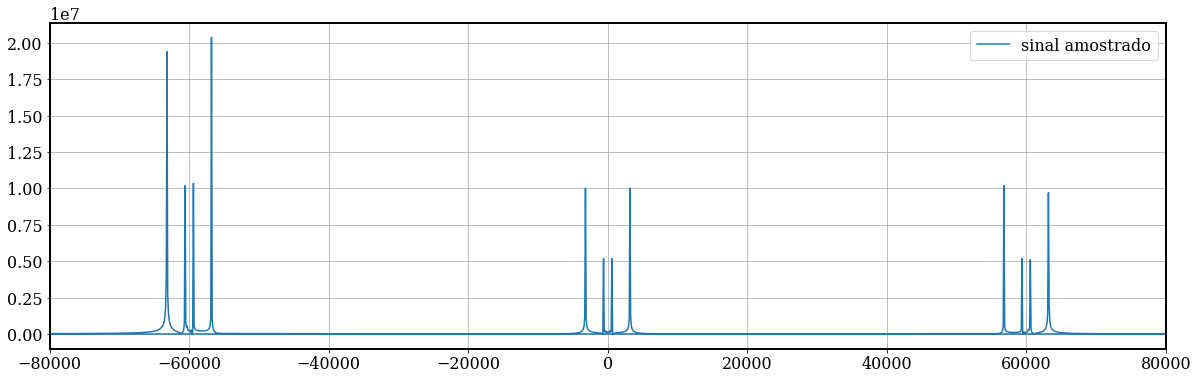

In [806]:
y = x(t)*np.exp(j*2*pi/Tl*t*0) + x(t)*np.exp(j*2*pi/Tl*t*1) + x(t)*np.exp(j*2*pi/Tl*t*2) + x(t)*np.exp(-j*2*pi/Tl*t*1) + x(t)*np.exp(-j*2*pi/Tl*t*1)
f_ = np.fft.fftfreq(len(y), t[1] - t[0])
X_w = np.fft.fft(y)

figure = plt.figure(figsize = (20, 6))
plt.rc('axes', linewidth=2)
plt.rc('font', **font)
plt.plot(f_, abs(X_w)/(Ts*pi),label = 'sinal amostrado')
plt.grid(True)
plt.xlim([-80000, 80000])
plt.legend(loc = 'upper right')